In [1]:
import numpy as np
import numpy.random as rnd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

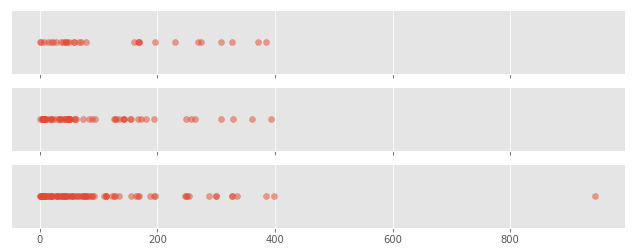

In [3]:
population_N = 200
population_scale = 100

population = rnd.exponential(population_scale, population_N)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(11, 4), sharex=True)
axs = axs.flatten()
for i, ax in enumerate(axs):
    sample_n = (i + 1) * 30
    xs = rnd.choice(population, sample_n)
    ys = np.zeros(xs.shape)
    ax.scatter(xs, ys, alpha=0.5)
    ax.get_yaxis().set_visible(False)
    ax.set_ylim(-1, 1)

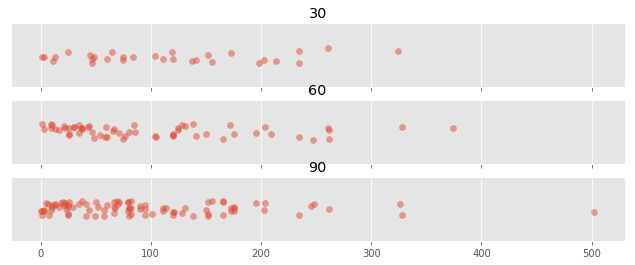

In [4]:
population_N = 200
population_scale = 100

population = rnd.exponential(population_scale, population_N)

jitter = 0.25
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(11, 4), sharex=True)
axs = axs.flatten()
for i, ax in enumerate(axs):
    sample_n = (i + 1) * 30
    xs = rnd.choice(population, sample_n)
    ys = rnd.uniform(-jitter, jitter, xs.shape[0])
    ax.scatter(xs, ys, alpha=0.5)
    ax.get_yaxis().set_visible(False)
    ax.set_title('{}'.format(sample_n))
    ax.set_ylim(-1, 1)

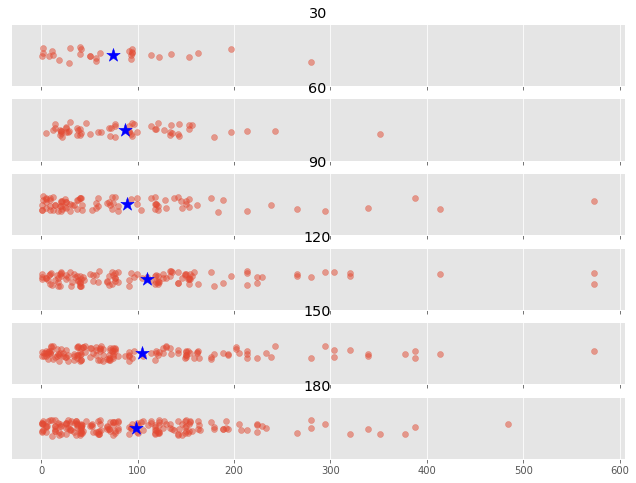

In [5]:
population_N = 200
population_scale = 100

population = rnd.exponential(population_scale, population_N)

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(11, 8), sharex=True)
axs = axs.flatten()
jitter = 0.25
for i, ax in enumerate(axs):
    sample_n = (i + 1) * 30
    xs = rnd.choice(population, sample_n)
    ys = rnd.uniform(-jitter, jitter, xs.shape[0])
    ax.scatter(xs, ys, alpha=0.5)
    ax.scatter(xs.mean(), 0, alpha=1.0, color='b', marker='*', s=200)
    ax.get_yaxis().set_visible(False)
    ax.set_title('{}'.format(sample_n))
    ax.set_ylim(-1, 1)

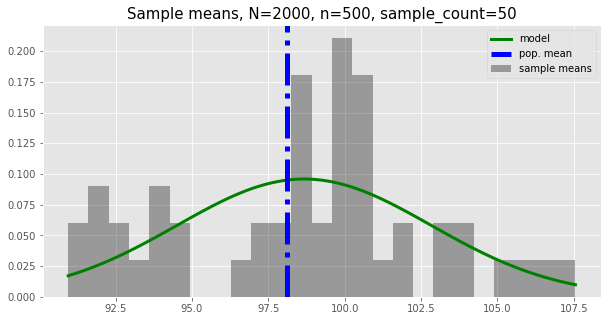

In [6]:
population_N = 2000
sample_n = 500
sample_count = 50

population = rnd.exponential(population_scale, population_N)
population_mean = population.mean()
sample_means = np.array([rnd.choice(population, sample_n).mean() for _ in range(sample_count)])

var_of_sample_means = sample_means.var()
mean_of_sample_means = sample_means.mean()
sample_means_model = norm(loc=mean_of_sample_means, scale=np.sqrt(var_of_sample_means))
model_xs = np.linspace(sample_means.min(), sample_means.max(), 100)
model_ys = sample_means_model.pdf(model_xs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(model_xs, model_ys, color='g', lw=3, label='model')
ax.hist(sample_means, bins=25, density=True, color='k', alpha=0.33, label='sample means')
ax.set_title('Sample means, N={}, n={}, sample_count={}'.format(population_N, sample_n, sample_count), size=15)
ax.axvline(population_mean, 0, 1.0, lw=5, color='b', ls='-.', label='pop. mean')
ax.legend(loc='best')

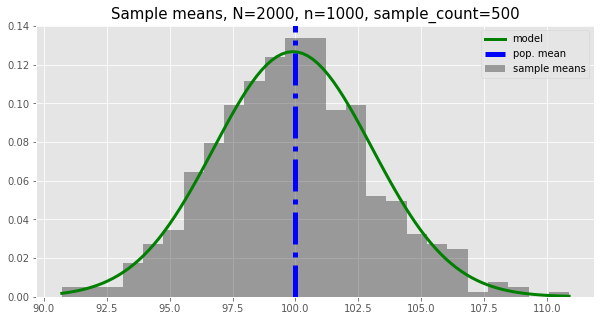

In [7]:
population_N = 2000
sample_n = 1000
sample_count = 500

population = rnd.exponential(population_scale, population_N)
population_mean = population.mean()
sample_means = np.array([rnd.choice(population, sample_n).mean() for _ in range(sample_count)])

var_of_sample_means = sample_means.var()
mean_of_sample_means = sample_means.mean()
sample_means_model = norm(loc=mean_of_sample_means, scale=np.sqrt(var_of_sample_means))
model_xs = np.linspace(sample_means.min(), sample_means.max(), 100)
model_ys = sample_means_model.pdf(model_xs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(model_xs, model_ys, color='g', lw=3, label='model')
ax.hist(sample_means, bins=25, density=True, color='k', alpha=0.33, label='sample means')
ax.set_title('Sample means, N={}, n={}, sample_count={}'.format(population_N, sample_n, sample_count), size=15)
ax.axvline(population_mean, 0, 1.0, lw=5, color='b', ls='-.', label='pop. mean')
ax.legend(loc='best')

0.18920396218929722


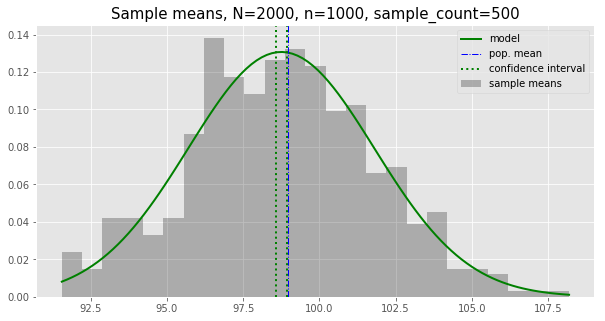

In [20]:
population_N = 2000
sample_n = 1000
sample_count = 500

population = rnd.exponential(population_scale, population_N)
population_mean = population.mean()
sample_means = np.array([rnd.choice(population, sample_n).mean() for _ in range(sample_count)])

var_of_sample_means = sample_means.var()
mean_of_sample_means = sample_means.mean()
std_of_sample_means = sample_means.std()

alpha = 1.96 * std_of_sample_means / np.sqrt(sample_n)

sample_means_model = norm(loc=mean_of_sample_means, scale=np.sqrt(var_of_sample_means))
model_xs = np.linspace(sample_means.min(), sample_means.max(), 100)
model_ys = sample_means_model.pdf(model_xs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(model_xs, model_ys, color='g', lw=2, label='model')
ax.hist(sample_means, bins=25, density=True, color='k', alpha=0.25, label='sample means')
ax.set_title('Sample means, N={}, n={}, sample_count={}'.format(population_N, sample_n, sample_count), size=15)
ax.axvline(population_mean, 0, 1.0, lw=1, color='b', ls='-.', label='pop. mean')
ax.axvline(mean_of_sample_means - alpha, 0, 1.0, lw=2, color='g', ls=':', label='confidence interval')
ax.axvline(mean_of_sample_means + alpha, 0, 1.0, lw=2, color='g', ls=':')
ax.legend(loc='best')

print(alpha)